In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    dfl['County'] = dfl['County'].str.upper()
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\historical.csv')
print(df)

     STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
0     FY001C01  Population at Each Census       1841        1841            -   
1     FY001C01  Population at Each Census       1841        1841            -   
2     FY001C01  Population at Each Census       1841        1841            -   
3     FY001C01  Population at Each Census       1841        1841           01   
4     FY001C01  Population at Each Census       1841        1841           01   
...        ...                        ...        ...         ...          ...   
2101  FY001C01  Population at Each Census       2022        2022           25   
2102  FY001C01  Population at Each Census       2022        2022           25   
2103  FY001C01  Population at Each Census       2022        2022           26   
2104  FY001C01  Population at Each Census       2022        2022           26   
2105  FY001C01  Population at Each Census       2022        2022           26   

        County C02199V02655

In [3]:
ireland_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\United_Ireland_Shape.shp')
print(ireland_shapefile)

    OBJECTID   CO_ID              ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000              DONEGAL       Dún na nGall     100013   
1          2  120000             LIMERICK          Luimneach     100022   
2          3   80000              KILDARE          Cill Dara     100007   
3          4  220000            WATERFORD        Port Láirge     100026   
4          5  260000               DUBLIN  Baile Átha Cliath     100002   
5          6  230000            WESTMEATH          An Iarmhí     100016   
6          7  170000             MONAGHAN         Muineachán     100025   
7          8  250000              WICKLOW      Cill Mhantáin     100008   
8          9   40000                 CORK           Corcaigh     100010   
9         10   70000                KERRY            Ciarraí     100005   
10        11  190000            ROSCOMMON         Ros Comáin     100027   
11        12  240000              WEXFORD        Loch Garman     100019   
12        13  130000     

In [4]:
df_1841 = df[(df['CensusYear'] == 1841) & (df['Sex'] == 'Both sexes')]
df_2022 = df[(df['CensusYear'] == 2022) & (df['Sex'] == 'Both sexes')]

In [5]:
def adjustSixCounties(modern_df, list_of_pops):
    temp = modern_df.iloc[0].copy()

    antrim_row = temp
    antrim_row['County'] = "ANTRIM"
    antrim_row['VALUE'] = list_of_pops[0] #354153
    modern_df = modern_df.append(antrim_row, ignore_index=True)

    armagh_row = temp
    armagh_row['County'] = "ARMAGH"
    armagh_row['VALUE'] = list_of_pops[1]#232398
    modern_df = modern_df.append(armagh_row, ignore_index=True)

    down_row = temp
    down_row['County'] = "DOWN"
    down_row['VALUE'] = list_of_pops[2]#368143
    modern_df = modern_df.append(down_row, ignore_index=True)

    fermanagh_row = temp
    fermanagh_row['County'] = "FERMANAGH"
    fermanagh_row['VALUE'] = list_of_pops[3]#156481
    modern_df = modern_df.append(fermanagh_row, ignore_index=True)

    derry_row = temp
    derry_row['County'] = "DERRY / LONDONDERRY"
    derry_row['VALUE'] = list_of_pops[4]#222174
    modern_df = modern_df.append(derry_row, ignore_index=True)

    tyrone_row = temp
    tyrone_row['County'] = "TYRONE"
    tyrone_row['VALUE'] = list_of_pops[5]#312956
    modern_df = modern_df.append(tyrone_row, ignore_index=True)

    return modern_df
df_1841 = adjustSixCounties(df_1841, [354153,232398,368143,156481,222174,312956])
df_2022 = adjustSixCounties(df_2022, [616384,159085,531665,61170,247132,177986])
print(df_1841)

   STATISTIC            Statistic Label  TLIST(A1)  CensusYear C02779V03348  \
0   FY001C01  Population at Each Census       1841        1841            -   
1   FY001C01  Population at Each Census       1841        1841           01   
2   FY001C01  Population at Each Census       1841        1841           02   
3   FY001C01  Population at Each Census       1841        1841           03   
4   FY001C01  Population at Each Census       1841        1841           04   
5   FY001C01  Population at Each Census       1841        1841           05   
6   FY001C01  Population at Each Census       1841        1841           06   
7   FY001C01  Population at Each Census       1841        1841           07   
8   FY001C01  Population at Each Census       1841        1841           08   
9   FY001C01  Population at Each Census       1841        1841           09   
10  FY001C01  Population at Each Census       1841        1841           10   
11  FY001C01  Population at Each Census       1841  

C:\Users\Tom\AppData\Local\Temp\ipykernel_11768\344119800.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.append(antrim_row, ignore_index=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_11768\344119800.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.append(armagh_row, ignore_index=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_11768\344119800.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.append(down_row, ignore_index=True)
C:\Users\Tom\AppData\Local\Temp\ipykernel_11768\344119800.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modern_df = modern_df.a

In [6]:
changes = [y-x for x,y in zip(df_1841['VALUE'].tolist(), df_2022['VALUE'].tolist())]

In [7]:
print(changes)

[-1379660, -24260, 1085381, 133286, -98260, -62053, -68740, 11463, 36998, -63707, -45079, -38114, 29708, -158456, -269962, -137422, -120493, -267658, -68824, -162461, -120098, -250917, -183332, -110688, -161454, -129364, -135154, 262231, -73313, 163522, -95311, 24958, -134970]


In [8]:
df_2022['Change'] = changes

In [9]:
merged_data = ireland_shapefile.merge(df_2022, how='left', left_on='ENGLISH', right_on='County')

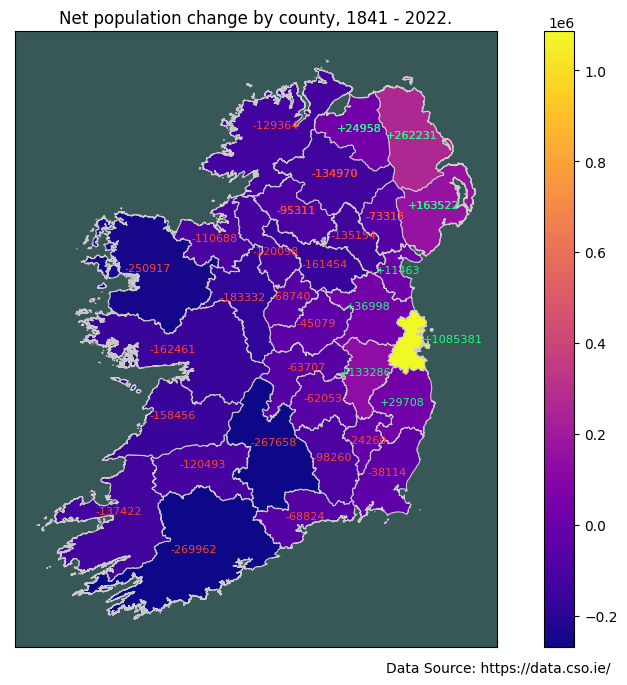

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

#merged_data['scaled_value'] = np.log1p(merged_data['VALUE'])

merged_data.plot(column='Change', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

text_color = "#FF452C"
font_size = 8

for idx,row in merged_data.iterrows():
        change = row['Change']
        if change > 0:
            text_color = "#1BFF7B"
            change = "+"+str(change)
        elif change < 0:
            text_color = "#FF452C"
        if row['ENGLISH'] == "DUBLIN":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+34000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size+.2, 
                            ha='center')
        elif row['ENGLISH'] == "OFFALY":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']+9000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "CORK":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+14000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "WESTMEATH":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "CAVAN":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-8500),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "SLIGO":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']-5000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "ROSCOMMON":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "LEITRIM":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-10000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KERRY":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+12000, row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KILDARE":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KILKENNY":
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X']+4500, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        else:
            plt.annotate(text=str(change), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')  # Adjust ha and va as needed

title_string = "Net population change by county, 1841 - 2022."
ax.set_title(title_string)

ax.set_facecolor('#385757') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.text(0.77, -0.04, "Data Source: https://data.cso.ie/ ", ha='left', transform=ax.transAxes)

plt.savefig('1841-2022-All_Population_Change.png')

plt.show()